<a href="https://colab.research.google.com/github/JayP127/Climate_change_portfolio/blob/main/TDcompany1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converged in 440 iterations to value function 12185374


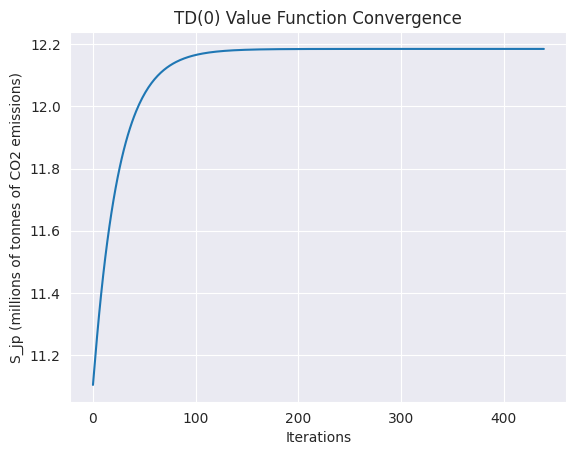

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

current_year = datetime.now().year

# Initial variables
CFP_Bp = np.random.triangular(1.50, 1.60, 1.70)
T_target = int(np.random.triangular(2045, 2050, 2055))
CFP_jp = np.random.triangular(0.38, 0.42, 0.46)
Q_jp = 726000

# Initial value function
S_jp = (CFP_Bp - CFP_jp) * Q_jp * (T_target - current_year) / 2

alpha = 0.01

# Observations
observations = [
  {'CFP_Bp': 1.61, 'Q_jp': 730000},
  {'CFP_jp': 0.43},
  {'T_target': 2051},
  {'Q_jp': 760000}
]

# Track convergence
last_S_jp = float("inf")

# Track value function
S_jp_history = [S_jp]

# Maximum number of iterations
max_iterations = 1000

iterations = 0
while iterations < max_iterations:

  for obs in observations:

    # Update variables
    if 'CFP_Bp' in obs:
      CFP_Bp = obs['CFP_Bp']
    if 'CFP_jp' in obs:
      CFP_jp = obs['CFP_jp']
    if 'Q_jp' in obs:
      Q_jp = obs['Q_jp']
    if 'T_target' in obs:
      T_target = obs['T_target']

    # Calculate TD target
    new_S_jp = (CFP_Bp - CFP_jp) * Q_jp * (T_target - current_year) / 2

    # TD update
    S_jp = (1 - alpha) * S_jp + alpha * new_S_jp

  # Track value function
  S_jp_history.append(S_jp)

  # Check convergence
  if abs(S_jp - last_S_jp) < 1e-3:
    break

  last_S_jp = S_jp
  iterations += 1

# Plot results
total_iterations = len(S_jp_history)
x = range(total_iterations)
y = [S / 1e6 for S in S_jp_history]

# Plot with Seaborn
sns.set_style("darkgrid")
ax = sns.lineplot(x=x, y=y)
ax.set(xlabel='Iterations',
       ylabel='S_jp (millions of tonnes of CO2 emissions)')
ax.set_title('TD(0) Value Function Convergence')

print(f"Converged in {total_iterations} iterations to value function {int(S_jp)}")
